# Holography Demo

A few basic demonstrations to introduce the RF holography framework.
Prepared by aph@sarao.ac.za using data from the SKA-MID prototype Dish, SDQM aka SKA-MPI.


                                                      As on 22/05/2025

In [1]:
%matplotlib inline
import pylab as plt
import numpy as np

In [2]:
import dvsholog as katholog
from dvs import hologreport
from analysis import katselib

/home/aph/work/dvs/libraries/analysis/katsemodels.py:1212: RuntimeWarning: divide by zero encountered in divide
  I_therm = lambda p, f_MHz: p[0] * (f_MHz/p[1])**2 * (1 - np.exp(-(f_MHz/p[1])**-2)) # The radiation intensity of a nebula in thermal equilibruim... Opacity tau(f)=(f/p[1])^2 fits the data.
/home/aph/work/dvs/libraries/analysis/katsemodels.py:1212: RuntimeWarning: invalid value encountered in multiply
  I_therm = lambda p, f_MHz: p[0] * (f_MHz/p[1])**2 * (1 - np.exp(-(f_MHz/p[1])**-2)) # The radiation intensity of a nebula in thermal equilibruim... Opacity tau(f)=(f/p[1])^2 fits the data.


## Notes on Convergence
1. For devmaps & offsets, use >=20deg in B1 & >=12deg in B2 & >=1.3deg in Ku-band.
2. Use gridsize=512 for all.


## xyzoffsets & other parameters
1. For SKA Dish, all PREDICTED patterns are generated rel. to F0 in SKA-TEL-DSH-0000018 rev 2.
2. Measured patterns are referenced to center of aperture (point Q0 in above).

In [3]:
F_mr, f_eq = 5.8518, 8.507 # From SKA-TEL-DSH-0000018 rev 2

# PREDICTED patterns generated rel. to secondary focus (F0 in SKA-TEL-DSH-0000018 rev 2), shift to center on Q0
pDISHPARAMS = dict(telescope="SKA", xyzoffsets=[0.0, 1.476396+8.04, 0], xmag=-f_eq/F_mr, focallength=F_mr)

# Parameters for MEASURED patterns
# katholog x=cross-elevation=no offset,
#          y=elevation direction=el_axis_to_centre_on_main_reflector,
#          z=beam direction = az_axis_to_centre_on_main_reflector (from 316-000000-022 rev 1)
DISHPARAMS = dict(telescope="SKA", xyzoffsets=[0.0, 1.49, -3.52], xmag=-f_eq/F_mr, focallength=F_mr)

# Demonstrate PREDICTED Patterns
Show that all patterns are properly centered in aperture plane, and "up" appears up.

In [4]:
def demo_plots(amH, amV):
    """ Just some simple aperture plane plots from H & V maps. """
    axs = subplots(2,3, figsize=(14,8))[1]
    for ax,am in zip(axs, (amH,amV)):
        plt.sca(ax[0]); am.plot("amp", doclf=False)
        plt.sca(ax[1]); am.plot("dev", doclf=False) # CAUTION: this includes deviation from feed phase
        plt.sca(ax[2]); plt.title("... without the cookie cutter")
        npdm = katholog.utilities.getdeviation(am.nopointingphasemap,am.mapsize,am.gridsize,am.wavelength,am.focallength,am.parabolaoffsetdev)
        clim = ax[1]._children[0].get_clim()
        plt.imshow(npdm, clim=clim, cmap=am.colmap, extent=[i*am.mapsize/2.0 for i in [-1,1,-1,1]], origin='lower'); plt.colorbar()


Find sampling 0.065280[deg], extent 29.851618[deg]
Starting (double) Direct Fourier Transform using 128 processes
DFT time: 6.6s
flatmode=pointingonly
Starting (double) Direct Fourier Transform using 128 processes
DFT time: 6.7s
flatmode=pointingonly


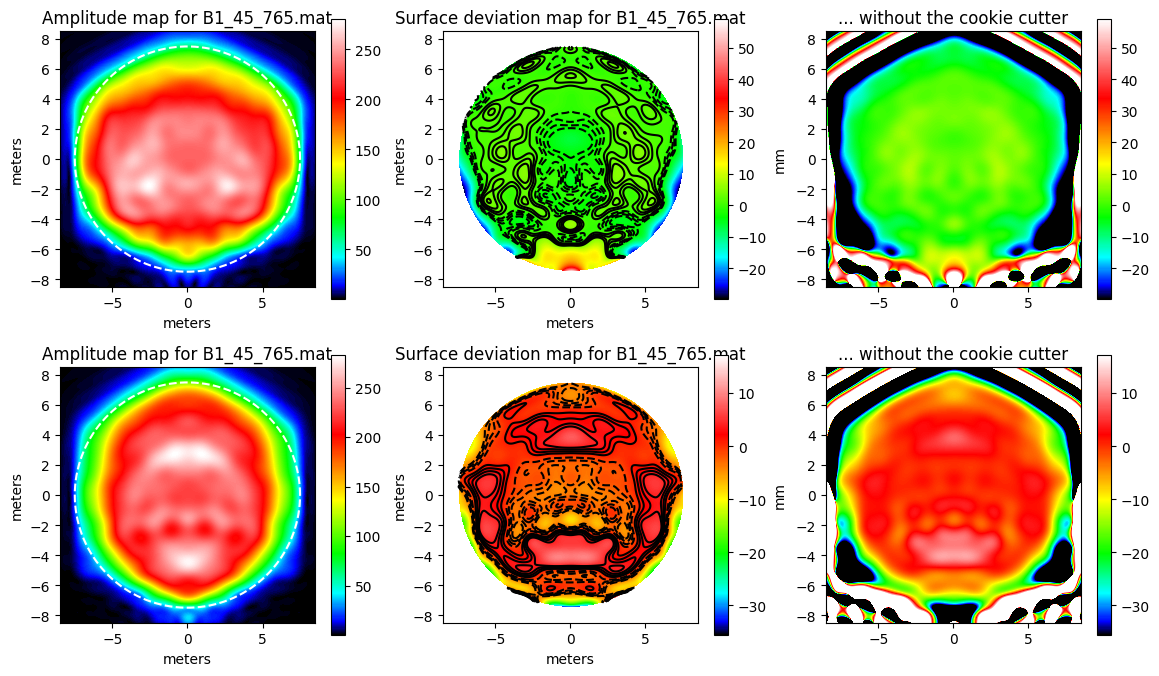

In [5]:
# B1, approximately center of band
b, amH, amV = hologreport.load_predicted(765, None, pDISHPARAMS, el_deg=45, band="B1", clipextent=30, gridsize=512)

demo_plots(amH, amV)

Find sampling 0.025816[deg], extent 11.978080[deg]
Starting (double) Direct Fourier Transform using 128 processes
DFT time: 4.1s
flatmode=pointingonly
Starting (double) Direct Fourier Transform using 128 processes
DFT time: 4.1s
flatmode=pointingonly


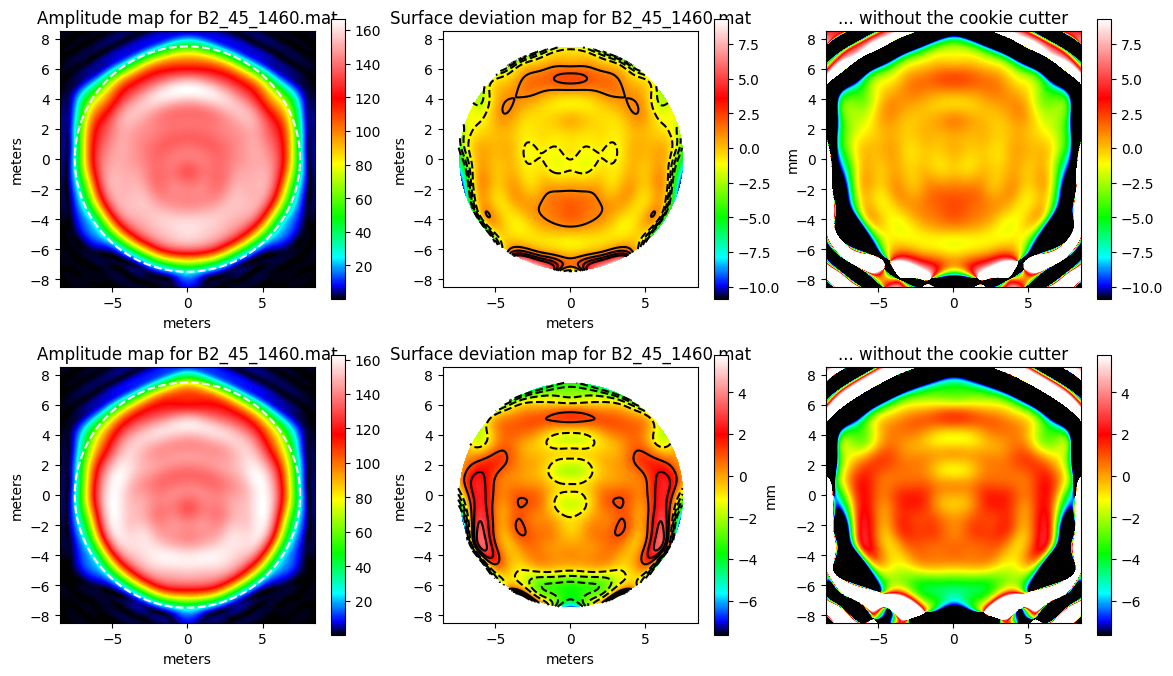

In [6]:
# B2, approximately center of band
b, amH, amV = hologreport.load_predicted(1460, None, pDISHPARAMS, el_deg=45, band="B2", clipextent=12, gridsize=512)

demo_plots(amH, amV)

Find sampling 0.004355[deg], extent 1.999898[deg]
Starting (double) Direct Fourier Transform using 128 processes
DFT time: 18.0s
flatmode=pointingonly
Starting (double) Direct Fourier Transform using 128 processes
DFT time: 17.8s
flatmode=pointingonly


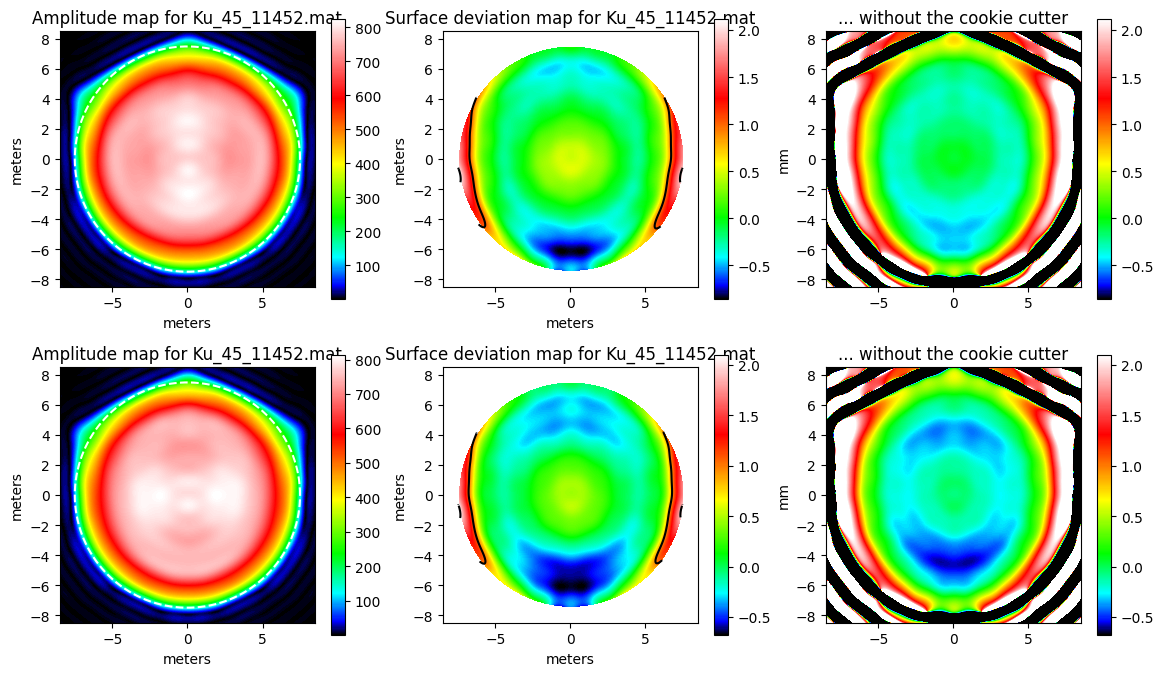

In [7]:
# Ku-band
b, amH, amV = hologreport.load_predicted(11452, None, pDISHPARAMS, el_deg=45, band="Ku", clipextent=2, gridsize=512)

demo_plots(amH, amV)

In [23]:
# "eff0" are calculated from the measured patterns "as-is"
(amH.eff0_spillover, # NOT accurately constrained from far field patterns
 amH.eff0_taper,
 amH.eff0_phase,
 amH.eff0_illumination, # Here, illumination = taper*phase so need to multiply with spillover to get the "aperture illumination"
 amH.eff0_illumination*amH.eff0_spillover)

(0.9954056647099446,
 0.918807268386101,
 0.963726688898286,
 0.885479086497416,
 0.881410898681715)

In [24]:
# "eff" are calculated after adjusting the measured pattern to compensate for the modeled collimation errors
(amH.eff_spillover, # NOT accurately constrained from far field patterns
 amH.eff_taper,
 amH.eff_phase,
 amH.eff_illumination, # Here, illumination = taper*phase so need to multiply with spillover to get the "aperture illumination"
 amH.eff_illumination*amH.eff_spillover)

(0.9954056647099446,
 0.9188072683861016,
 0.9795612623889662,
 0.9000280077124473,
 0.8958929772745757)

# Standard Reports for Measured Datasets

For demonstration purposes just Ku @ 11452MHz, circular pol.

## All Relevant Predicted Patterns

In [6]:
pred = hologreport.ResultSet("predicted", f_MHz=[12501.5], beacon_pol=["LCP"], clipextent=2.8)

for f,pol in zip(pred.f_MHz,pred.beacon_pol):
    b, aH, aV = hologreport.load_predicted(f, pol, pDISHPARAMS, el_deg=45, clipextent=pred.clipextent, gridsize=512)
    pred.beams.append(b); pred.apmapsH.append(aH); pred.apmapsV.append(aV)

filename is ../models/beam-patterns/ska/MK_GDSatcom_Ku_125015.mat
filename is ../models/beam-patterns/ska/MK_GDSatcom_125015.mat
filename is ../models/beam-patterns/ska/Ku_45_12501_5.mat
Find sampling 0.006100[deg], extent 2.799721[deg]
Starting (double) Direct Fourier Transform using 128 processes
DFT time: 29.8s
flatmode=pointingonly
flatmode=flat
Starting (double) Direct Fourier Transform using 128 processes
DFT time: 29.0s
flatmode=pointingonly
flatmode=flat


## Measured Datasets from 2025


In [8]:
# Path to local cache of datasets
filename = lambda fid: f"./demo_data/{fid}/{fid}_sdp_l0.full.rdb"

In [14]:
# High density pattern
ms_LCP = hologreport.ResultSet(1746821649,f_MHz=[12499],beacon_pol=["LCP"],clipextent=6,tags=["night","IS 22"])
b, aH, aV = hologreport.load_data(filename(ms_LCP.fid), ms_LCP.f_MHz, "s0121", DISHPARAMS, clipextent=ms_LCP.clipextent, loadscan_cycles=ms_LCP.cycles,
                                  dMHz=0.1, gridsize=512, flag_slew=True, flags_hrs=ms_LCP.flags_hrs)
ms_LCP.beams.extend(b); ms_LCP.apmapsH.extend(aH); ms_LCP.apmapsV.extend(aV)

filename is ./demo_data/1746821649/1746821649_sdp_l0.full.rdb


Error: ./demo_data/1746821649/1746821649_sdp_l0.full.rdb is not a holography dataset
Trying anyways


Extracting timestamps


Find sampling 0.017493[deg], extent 5.986390[deg]
Selecting data according to: {'targetname': None, 'ignoreantennas': [], 'group': 0, 'clipextent': 6}
Flagged 636 timestamps due to slew
Find sampling 0.017493[deg], extent 5.986390[deg]
resolved using 1 channels, 0.2MHz bandwidth instead of 0.1MHz, (12499.1-12499.1)
Number of channels 1 at 12499.000000MHz within 0.167188MHz bandwidth (0.104492MHz)
Independent DIRECT calculation
using 15135 time samples and 1 channels
s0121: m028-s0121 ntime: 15135 load: 1.4 process: 0.0
Fitting done
Extracting data at 0 0 in target field (region radius 0.00031)
Detected 80 on-axis time intervals
DEBUG NOTE Time to load upfront:  0.7151458263397217
number of time samples  80  ROI used:  0.0003053143322461711
GAINRAWABS calculation
using 26680 time samples and 1 channels
s0121: m028-s0121not doing delay
 ntime: 26680 load: 3.1 process: 0.0
Starting (double) Direct Fourier Transform using 128 processes
DFT time: 17.9s
flatmode=pointingonly
flatmode=flat
St

Target: INTELSAT 22 (IS-22)  [dataset 1746821649]
Processing tags: ['night', 'IS 22']

-------------------- 12499.0MHz
>> 25.1 degEl @ 0.21 hrs [local time]; SNR~[[51. 46.], [52. 46.], [50. 46.], [50. 46.]]
>> Sun from dAz~nandeg, dEl~nandeg, mean wind<3.672322669773662m/s from dAz~179deg
flatmode=pointingonly
flatmode=flat
flatmode=pointingonly
flatmode=flat
SKA Feed XYZ_f offsets (feed removed) [mm]
    H-pol [-1.24474336  3.41924705  2.46147047] 		V-pol [-1.05574268  4.25248339  2.21254127]	(FI @ 103.374 deg)
Aperture plane RMS (feed removed) [mm]:  as-is; re-collimated
              H-pol 0.24; 0.21		V-pol 0.27; 0.25
Reflector phase efficiency (feed removed):  as-is; re-collimated
    12.5 GHz: H-pol 0.984985; 0.988213		V-pol 0.980578; 0.983264
    15.0 GHz: H-pol 0.978495; 0.983083		V-pol 0.972215; 0.97601
    20.0 GHz: H-pol 0.962304; 0.97019		V-pol 0.951431; 0.95786
Error Beam
    H-pol < 58.4[15.0]% (95pct 56.5%, std 17.5%)		V-pol < 59.4[15.0]% (95pct 56.2%, std 17.5%)


/home/aph/venv-py3/lib/python3.10/site-packages/dvsholog/beam.py:1030: RuntimeWarning: divide by zero encountered in log10
  im=plt.imshow(20.0*np.log10(np.abs(Quant[ich,:,:])),extent=extents,cmap=self.colmap,origin='lower',vmin=clim[0],vmax=clim[1])


Report generated <bruce.science.kat.ac.za:/home/aph/work/dvs/notebooks/ku_hologreport_s0121_1746821649.pdf>


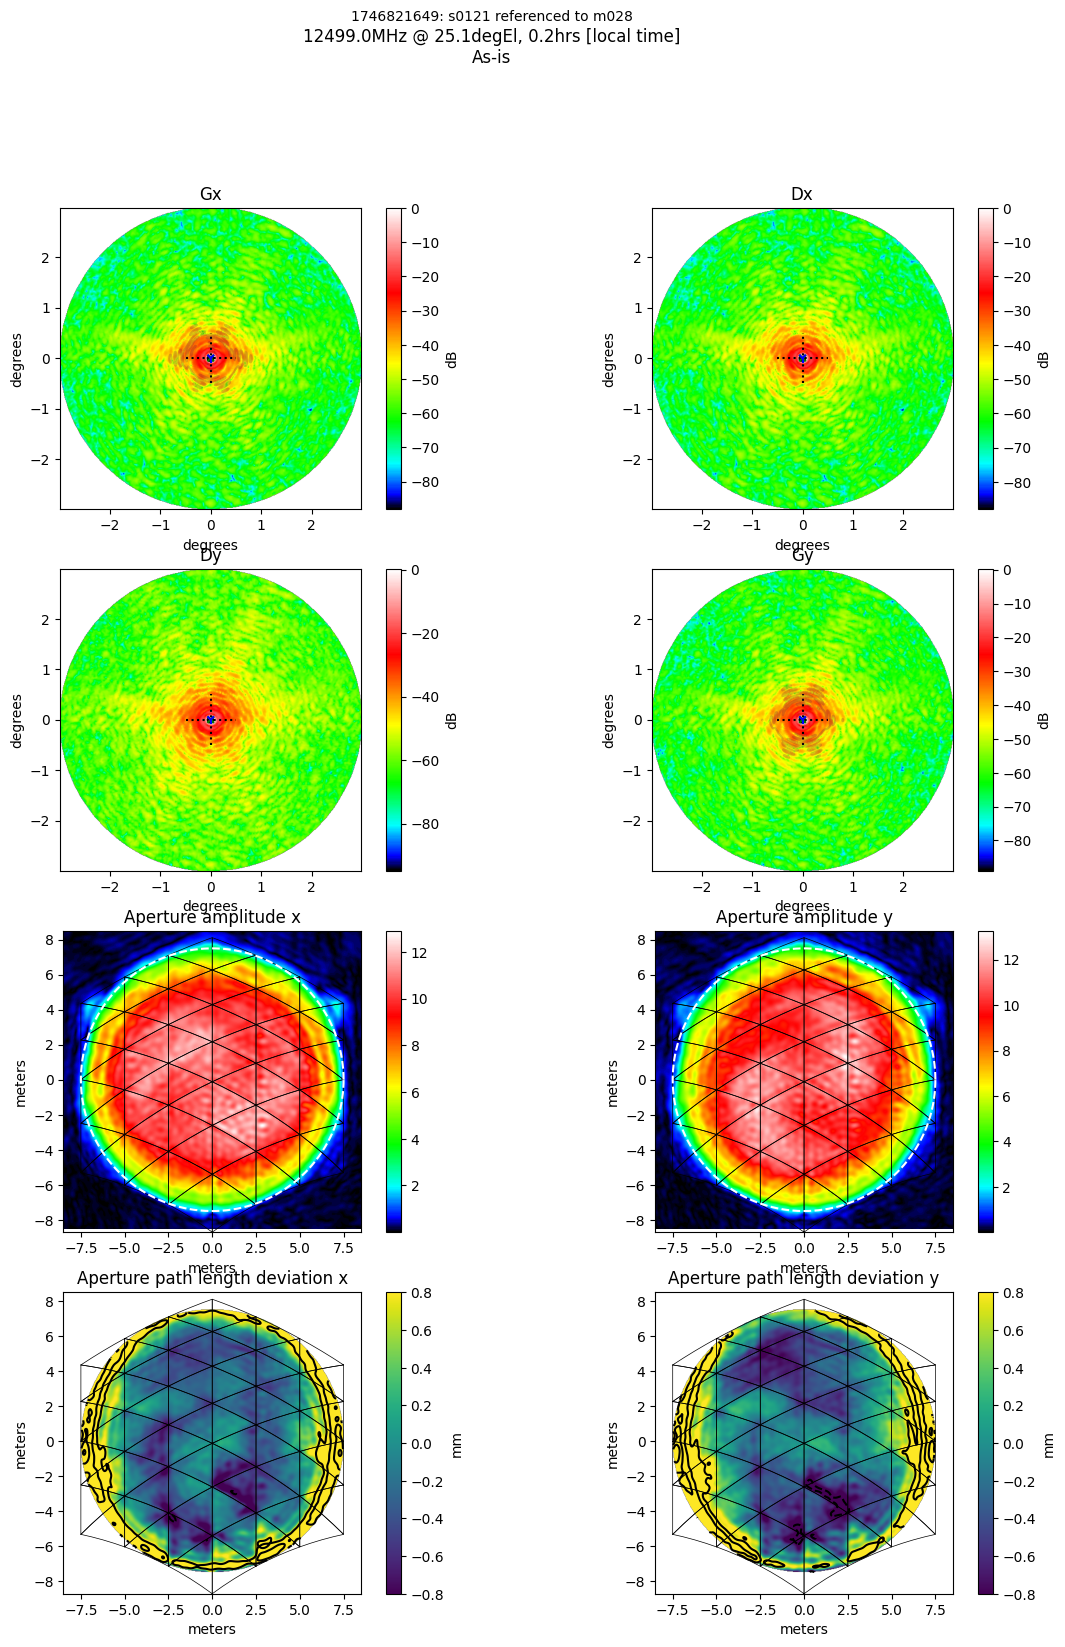

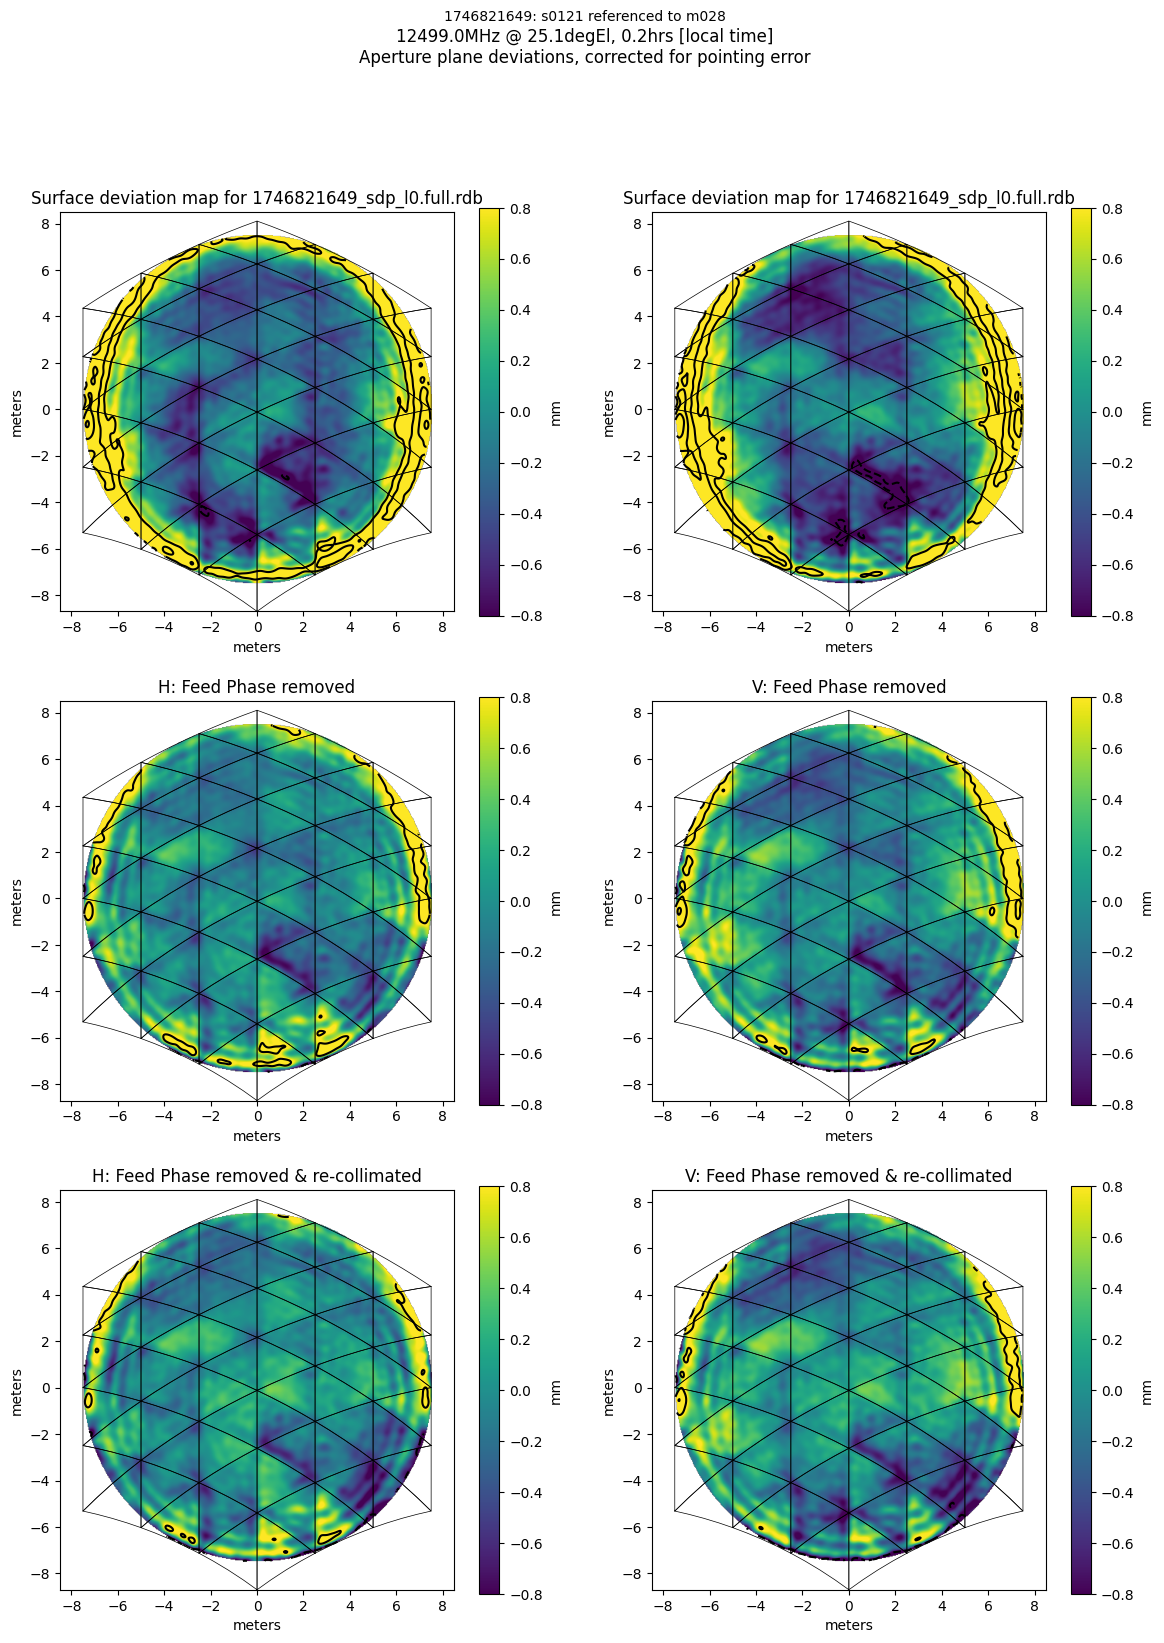

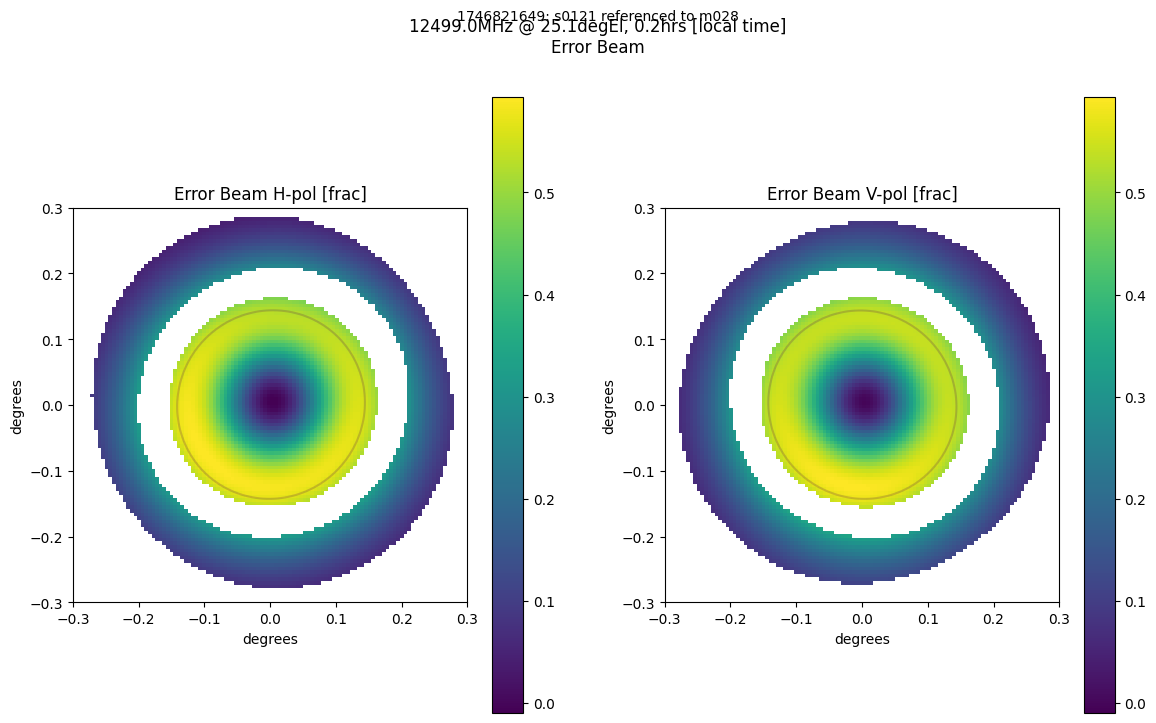

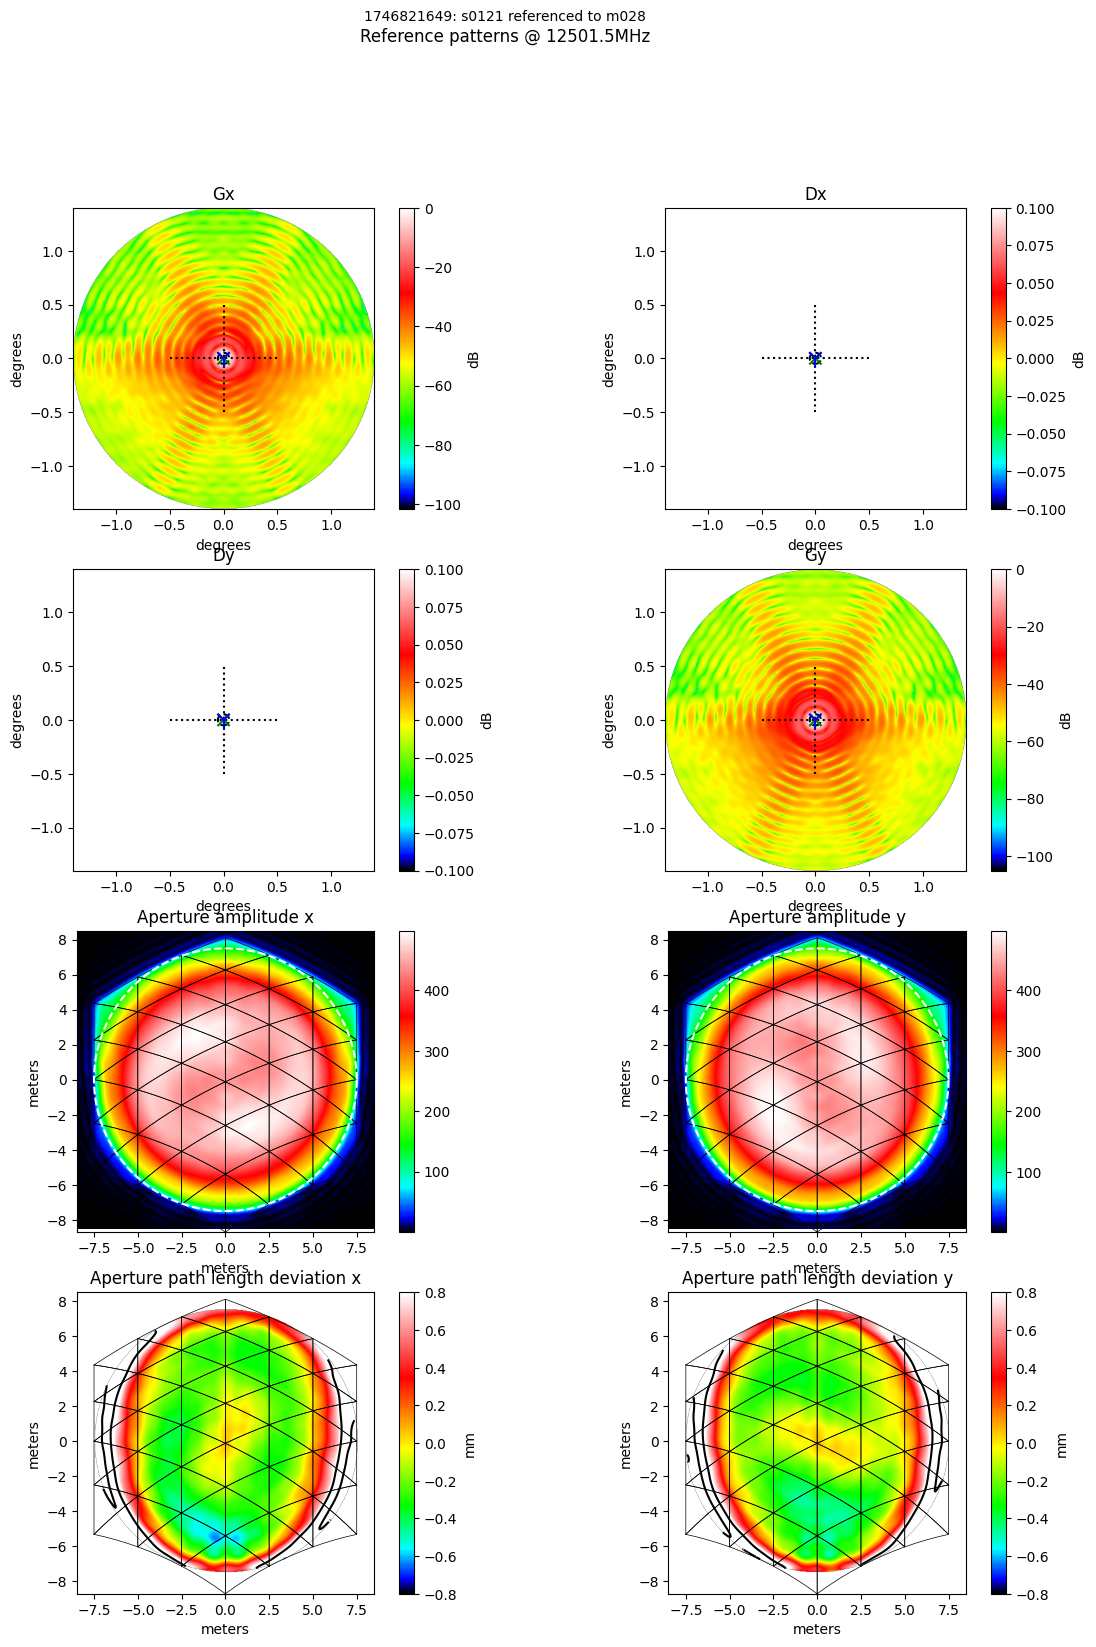

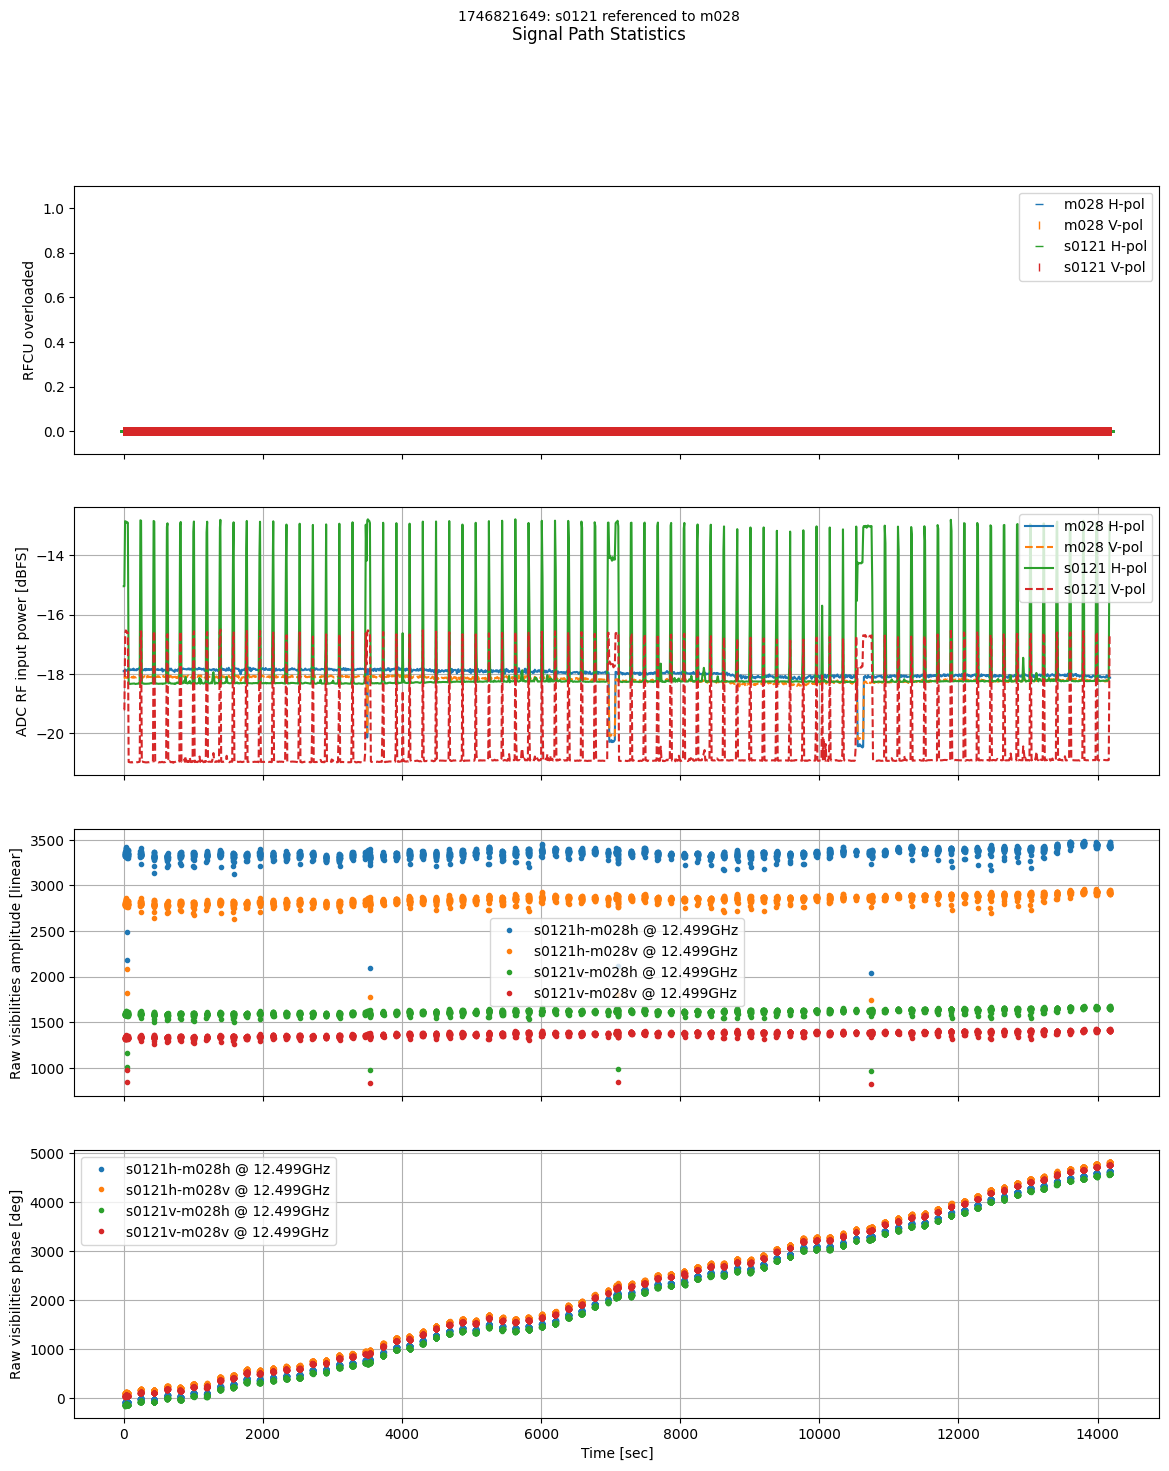

In [17]:
# A "sequential(2)" i.e. monotonic in lightness but with a kink around mid-range for emphasis.
# This seems more appropriate for showing 'devmaps' than the default offered by katholog.
CM = plt.cm.afmhot
CM = plt.cm.viridis

hologreport.generate_results(ms_LCP, pred, beampolydegree=28, beamsmoothing="zernike", eb_extent=(-0.3,0.3),
                             SNR_min=30, phaseRMS_max=50, cmap=CM, makepdfs=True);

In [ ]:
# Note: there's an issue currently with ErrorBeam calculation if the extent of the measured data is different from the extent of the predicted data.

In [18]:
# !cp -r ../ska121/l1_data/1746821649* ./demo_data
!rm -rf ./demo_data/1635972687*

### List of observations + info

In [12]:
katselib.ls_archive("Antennas:s0000 AND InstructionSet:*holography_scan* AND Description:Ku AND ExperimentID:[20211103 TO 20211104]",min_duration=1000,
                    fields=['CaptureBlockId','StartTime','Description','Targets','InstructionSet'], field_len=130);

1635913228 	2021-11-03T04:20:27Z 	SDQM: Ku-band Holography 	['azimuthunwrap', 'INTELSAT NEW DAWN'] 	/home/kat/katsdpscripts/observation/holography_scan.py --prepopulatetime 30 --scan-ants s0000 --kind radial --scan-extent 1.8 --sc
1635924315 	2021-11-03T07:25:15Z 	SDQM: Ku-band Holography 	['INTELSAT NEW DAWN', 'azimuthunwrap'] 	/home/kat/katsdpscripts/observation/holography_scan.py --prepopulatetime 30 --scan-ants s0000 --kind radial --scan-extent 1.8 --sc
1635955590 	2021-11-03T16:06:29Z 	SDQM: Ku-band Holography 	['INTELSAT NEW DAWN', 'azimuthunwrap'] 	/home/kat/katsdpscripts/observation/holography_scan.py --prepopulatetime 30 --scan-ants s0000 --kind radial --scan-extent 1.8 --sc
1635972687 	2021-11-03T20:51:26Z 	SDQM: Ku-band Holography 	['azimuthunwrap', 'INTELSAT NEW DAWN'] 	/home/kat/katsdpscripts/observation/holography_scan.py --prepopulatetime 30 --scan-ants s0000 --kind radial --scan-extent 1.8 --sc
1635974516 	2021-11-03T21:21:55Z 	SDQM: Ku-band Holography  - Spiral 	['INTE